

---



# 1) PREPARACIÓN DE DATOS

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = 'tai256c.dat'

Saving tai256c.dat to tai256c.dat


In [ ]:
import numpy as np
import random

# Lectura de datos
data = np.loadtxt('tai256c.dat', skiprows=1)
flow = np.int32(data[:256])
distances = np.int32(data[256:])

print(flow)
print(distances)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[     0 100000  25000 ...  10000  20000  50000]
 [100000      0 100000 ...   5882  10000  20000]
 [ 25000 100000      0 ...   3846   5882  10000]
 ...
 [ 10000   5882   3846 ...      0 100000  25000]
 [ 20000  10000   5882 ... 100000      0 100000]
 [ 50000  20000  10000 ...  25000 100000      0]]


In [ ]:
# Configuración de la semilla
seed = 2024
random.seed(seed)
np.random.seed(seed)

# Generación de la población inicial
population = np.array([np.random.permutation(np.arange(256)) for _ in range(1000)])

# Función fitness
def fitness(population, flow, distances):
    return np.sum(flow[np.newaxis, :, :] * distances[population[:,:,np.newaxis],
                  population[:, np.newaxis, :]], axis=(1,2))

# 2) IMPLEMENTACIONES

## 2.1) Algoritmo genético estándar (GA-1)

In [ ]:
import numpy as np

# Selección por torneo
def tournament_selection(population, fitness_vals):
    selected = []
    for _ in range(len(population)):
        i, j = np.random.choice(len(population), 2, replace=False)
        selected.append(population[i] if fitness_vals[i] < fitness_vals[j] else population[j])
    return np.array(selected)

# Cruce: Intercambio aleatorio de un segmento
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(np.random.choice(size, 2, replace=False))
    offspring = -np.ones(size, dtype=int)
    offspring[start:end+1] = parent1[start:end+1]
    for val in parent2:
        if val not in offspring:
            offspring[np.where(offspring == -1)[0][0]] = val
    return offspring

# Mutación: Intercambio de dos posiciones
def mutate(individual):
    i, j = np.random.choice(len(individual), 2, replace=False)
    individual[i], individual[j] = individual[j], individual[i]
    return individual

Iniciando algoritmo genético estándar...
Generación 1/100: Evaluando fitness...
Generación 1: Mejor fitness = 49640646
Generación 1: Realizando selección por torneo...
Generación 2/100: Evaluando fitness...
Generación 2: Mejor fitness = 49640646
Generación 2: Realizando selección por torneo...
Generación 3/100: Evaluando fitness...
Generación 3: Mejor fitness = 49640646
Generación 3: Realizando selección por torneo...
Generación 4/100: Evaluando fitness...
Generación 4: Mejor fitness = 49640646
Generación 4: Realizando selección por torneo...
Generación 5/100: Evaluando fitness...
Generación 5: Mejor fitness = 49709320
Generación 5: Realizando selección por torneo...
Generación 6/100: Evaluando fitness...
Generación 6: Mejor fitness = 49674958
Generación 6: Realizando selección por torneo...
Generación 7/100: Evaluando fitness...
Generación 7: Mejor fitness = 49770580
Generación 7: Realizando selección por torneo...
Generación 8/100: Evaluando fitness...
Generación 8: Mejor fitness = 4

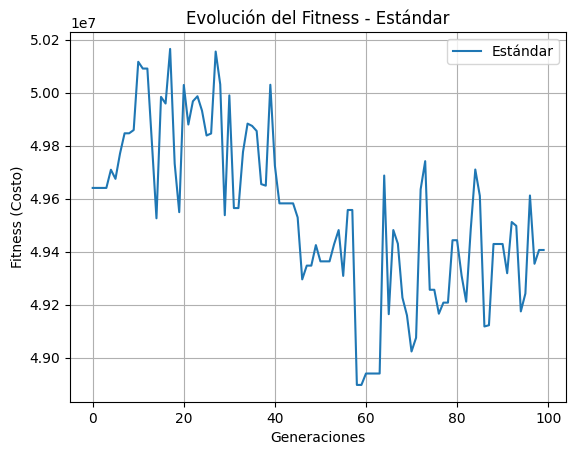

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Algoritmo genético
def genetic_algorithm(flow, distances, population, generations=100, crossover_rate=0.8, mutation_rate=0.1):
    best_fitness_per_gen = []

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness...")
        fitness_vals = fitness(population, flow, distances)
        best_fitness = np.min(fitness_vals)
        best_fitness_per_gen.append(best_fitness)
        print(f"Generación {gen + 1}: Mejor fitness = {best_fitness}")

        # Selección por torneo
        print(f"Generación {gen + 1}: Realizando selección por torneo...")
        population = tournament_selection(population, fitness_vals)
        next_generation = []

        for i in range(0, len(population), 2):
            if i + 1 >= len(population):
                break
            if np.random.rand() < crossover_rate:
                offspring1 = crossover(population[i], population[i + 1])
                offspring2 = crossover(population[i + 1], population[i])
            else:
                offspring1, offspring2 = population[i], population[i + 1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation)

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecución del algoritmo
print("Iniciando algoritmo genético estándar...")
start_time = time.time()
best_solution_standard, best_cost_standard, fitness_standard = genetic_algorithm(flow, distances, population.copy())
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_standard)
print("Costo asociado:")
print(best_cost_standard)

# Visualizar evolución del fitness
plt.plot(fitness_standard, label='Estándar')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - Estándar')
plt.legend()
plt.grid()
plt.show()

## 2.2) Variante baldwiniana (GA-2)

Generación 1/50: Evaluando fitness con optimización local...
  Procesando individuo 1/500...
  Procesando individuo 101/500...
  Procesando individuo 201/500...
  Procesando individuo 301/500...
  Procesando individuo 401/500...
Generación 1: Mejor fitness hasta ahora = 48447724
Generación 1: Realizando selección por torneo...
Generación 2/50: Evaluando fitness con optimización local...
  Procesando individuo 1/500...
  Procesando individuo 101/500...
  Procesando individuo 201/500...
  Procesando individuo 301/500...
  Procesando individuo 401/500...
Generación 2: Mejor fitness hasta ahora = 48307120
Generación 2: Realizando selección por torneo...
Generación 3/50: Evaluando fitness con optimización local...
  Procesando individuo 1/500...
  Procesando individuo 101/500...
  Procesando individuo 201/500...
  Procesando individuo 301/500...
  Procesando individuo 401/500...
Generación 3: Mejor fitness hasta ahora = 48363850
Generación 3: Realizando selección por torneo...
Generación 4/

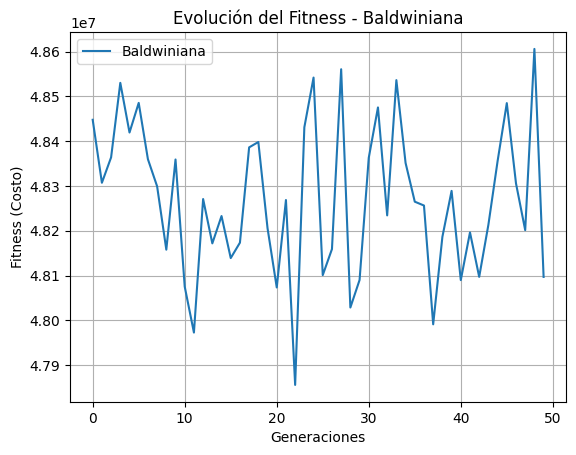

In [ ]:
import matplotlib.pyplot as plt
import time

# Función de optimización local: Hill Climbing
def hill_climbing(individual, flow, distances, max_iters=100):
    best_individual = individual.copy()
    best_cost = fitness(best_individual[np.newaxis, :], flow, distances)[0]

    for _ in range(max_iters):
        # Generar un vecino intercambiando dos posiciones
        i, j = np.random.choice(len(individual), 2, replace=False)
        neighbor = best_individual.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Calcular el costo del vecino
        neighbor_cost = fitness(neighbor[np.newaxis, :], flow, distances)[0]

        # Si el vecino es mejor, actualizar
        if neighbor_cost < best_cost:
            best_individual, best_cost = neighbor, neighbor_cost

    return best_individual, best_cost

# Algoritmo genético con variante baldwiniana
def genetic_algorithm_baldwinian(flow, distances, population, generations=100, crossover_rate=0.9, mutation_rate=0.2):
    best_fitness_per_gen = []

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness con optimización local...")
        fitness_vals = []
        optimized_individuals = []

        for idx, individual in enumerate(population[:500]):
            if idx % 100 == 0:
                print(f"  Procesando individuo {idx + 1}/500...")
            optimized_individual, local_cost = hill_climbing(individual, flow, distances)
            fitness_vals.append(local_cost)
            optimized_individuals.append(individual)

        fitness_vals = np.array(fitness_vals)
        population = np.array(optimized_individuals)
        best_fitness_per_gen.append(np.min(fitness_vals))

        print(f"Generación {gen + 1}: Mejor fitness hasta ahora = {np.min(fitness_vals)}")

        print(f"Generación {gen + 1}: Realizando selección por torneo...")
        population = tournament_selection(population, fitness_vals)
        next_generation = []

        for i in range(0, len(population), 2):
            if i + 1 >= len(population):
                break
            if np.random.rand() < crossover_rate:
                offspring1 = crossover(population[i], population[i + 1])
                offspring2 = crossover(population[i + 1], population[i])
            else:
                offspring1, offspring2 = population[i], population[i + 1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:1000])

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecutar y comparar variantes
start_time = time.time()
best_solution_baldwinian, best_cost_baldwinian, fitness_baldwinian = genetic_algorithm_baldwinian(flow, distances, population.copy(), generations=50)
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_baldwinian)
print("Costo asociado:")
print(best_cost_baldwinian)

# Visualizar evolución del fitness
plt.plot(fitness_baldwinian, label='Baldwiniana')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - Baldwiniana')
plt.legend()
plt.grid()
plt.show()

## 2.3) Variante lamarckiana (GA-3)

Iniciando algoritmo genético con variante lamarckiana...
Generación 1/100: Evaluando fitness con optimización local...
Generación 1: Mejor fitness hasta ahora = 48039732
Generación 1: Realizando selección por torneo...
Generación 2/100: Evaluando fitness con optimización local...
Generación 2: Mejor fitness hasta ahora = 47756742
Generación 2: Realizando selección por torneo...
Generación 3/100: Evaluando fitness con optimización local...
Generación 3: Mejor fitness hasta ahora = 47344186
Generación 3: Realizando selección por torneo...
Generación 4/100: Evaluando fitness con optimización local...
Generación 4: Mejor fitness hasta ahora = 47026360
Generación 4: Realizando selección por torneo...
Generación 5/100: Evaluando fitness con optimización local...
Generación 5: Mejor fitness hasta ahora = 46598666
Generación 5: Realizando selección por torneo...
Generación 6/100: Evaluando fitness con optimización local...
Generación 6: Mejor fitness hasta ahora = 46830320
Generación 6: Realiz

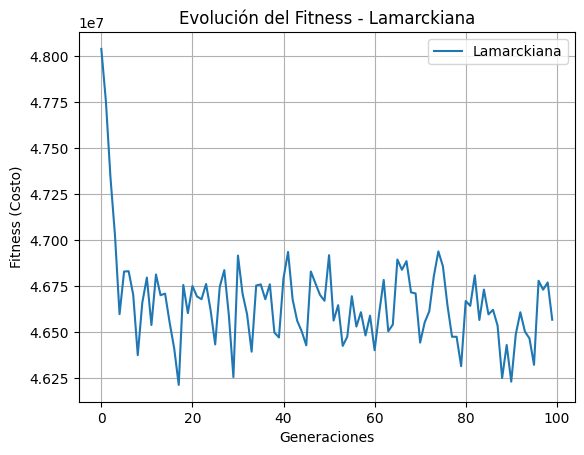

In [ ]:
import matplotlib.pyplot as plt
import time

# Función de optimización local: Hill Climbing
def hill_climbing(individual, flow, distances, max_iters=100):
    best_individual = individual.copy()
    best_cost = fitness(best_individual[np.newaxis, :], flow, distances)[0]

    for _ in range(max_iters):
        # Generar un vecino intercambiando dos posiciones
        i, j = np.random.choice(len(individual), 2, replace=False)
        neighbor = best_individual.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Calcular el costo del vecino
        neighbor_cost = fitness(neighbor[np.newaxis, :], flow, distances)[0]

        # Si el vecino es mejor, actualizar
        if neighbor_cost < best_cost:
            best_individual, best_cost = neighbor, neighbor_cost

    return best_individual, best_cost

# Algoritmo genético con variante lamarckiana
def genetic_algorithm_lamarckian(flow, distances, population, generations=100, crossover_rate=0.9, mutation_rate=0.2):
    best_fitness_per_gen = []

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness con optimización local...")
        fitness_vals = []
        optimized_population = []

        for individual in population:
            optimized_individual, local_cost = hill_climbing(individual, flow, distances)
            fitness_vals.append(local_cost)
            optimized_population.append(optimized_individual)

        fitness_vals = np.array(fitness_vals)
        population = np.array(optimized_population)
        best_fitness_per_gen.append(np.min(fitness_vals))

        print(f"Generación {gen + 1}: Mejor fitness hasta ahora = {np.min(fitness_vals)}")

        print(f"Generación {gen + 1}: Realizando selección por torneo...")
        population = tournament_selection(population, fitness_vals)
        next_generation = []

        for i in range(0, len(population), 2):
            if i + 1 >= len(population):
                break
            if np.random.rand() < crossover_rate:
                offspring1 = crossover(population[i], population[i + 1])
                offspring2 = crossover(population[i + 1], population[i])
            else:
                offspring1, offspring2 = population[i], population[i + 1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:1000])

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecutar y comparar variantes
print("Iniciando algoritmo genético con variante lamarckiana...")
start_time = time.time()
best_solution_lamarckian, best_cost_lamarckian, fitness_lamarckian = genetic_algorithm_lamarckian(flow, distances, population.copy(), generations=100)
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_lamarckian)
print("Costo asociado:")
print(best_cost_lamarckian)

# Visualizar evolución del fitness
plt.plot(fitness_lamarckian, label='Lamarckiana')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - Lamarckiana')
plt.legend()
plt.grid()
plt.show()

## 2.4) Mejora de la variante lamarckiana (GA-4)

In [ ]:
# Selección basada en ranking
def rank_selection(population, fitness_vals):
    sorted_indices = np.argsort(fitness_vals)
    probabilities = np.linspace(1, 2, len(fitness_vals))[::-1]
    probabilities /= probabilities.sum()
    selected_indices = np.random.choice(sorted_indices, size=len(population), p=probabilities, replace=True)
    return population[selected_indices]

# Operador de cruce mejorado (Order Crossover - OX)
def order_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(np.random.choice(size, 2, replace=False))
    offspring = -np.ones(size, dtype=int)
    offspring[start:end+1] = parent1[start:end+1]
    pointer = 0

    for gene in parent2:
        if gene not in offspring:
            while offspring[pointer] != -1:
                pointer += 1
            offspring[pointer] = gene

    return offspring

Iniciando algoritmo genético con variante lamarckiana mejorada...
Generación 1/50: Evaluando fitness con optimización local...
Generación 1: Mejor fitness hasta ahora = 48129164
Generación 1: Realizando selección basada en ranking...
Generación 2/50: Evaluando fitness con optimización local...
Generación 2: Mejor fitness hasta ahora = 47171794
Generación 2: Realizando selección basada en ranking...
Generación 3/50: Evaluando fitness con optimización local...
Generación 3: Mejor fitness hasta ahora = 47063510
Generación 3: Realizando selección basada en ranking...
Generación 4/50: Evaluando fitness con optimización local...
Generación 4: Mejor fitness hasta ahora = 46674548
Generación 4: Realizando selección basada en ranking...
Generación 5/50: Evaluando fitness con optimización local...
Generación 5: Mejor fitness hasta ahora = 46581820
Generación 5: Realizando selección basada en ranking...
Generación 6/50: Evaluando fitness con optimización local...
Generación 6: Mejor fitness hasta

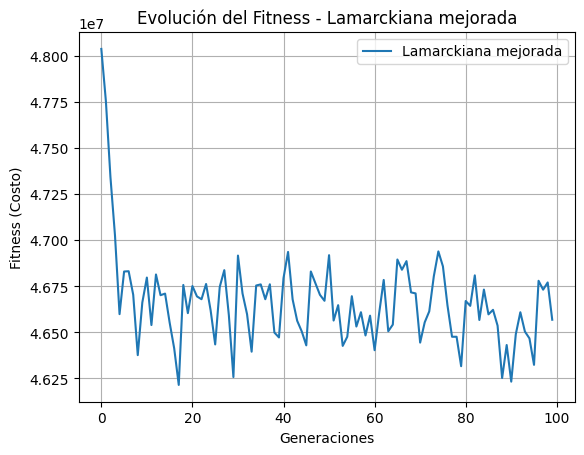

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Función de optimización local: Hill Climbing
def hill_climbing_2(individual, flow, distances, max_iters=150):
    best_individual = individual.copy()
    best_cost = fitness(best_individual[np.newaxis, :], flow, distances)[0]

    for _ in range(max_iters):
        # Generar un vecino intercambiando dos posiciones
        i, j = np.random.choice(len(individual), 2, replace=False)
        neighbor = best_individual.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Calcular el costo del vecino
        neighbor_cost = fitness(neighbor[np.newaxis, :], flow, distances)[0]

        # Si el vecino es mejor, actualizar
        if neighbor_cost < best_cost:
            best_individual, best_cost = neighbor, neighbor_cost

    return best_individual, best_cost


# Algoritmo genético con variante lamarckiana mejorada
def genetic_algorithm_lamarckian_v2(flow, distances, population, generations=50, crossover_rate=0.9, mutation_rate=0.3):
    best_fitness_per_gen = []

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness con optimización local...")
        fitness_vals = []
        optimized_population = []

        for individual in population:
            optimized_individual, local_cost = hill_climbing_2(individual, flow, distances)
            fitness_vals.append(local_cost)
            optimized_population.append(optimized_individual)

        fitness_vals = np.array(fitness_vals)
        population = np.array(optimized_population)
        best_fitness_per_gen.append(np.min(fitness_vals))

        print(f"Generación {gen + 1}: Mejor fitness hasta ahora = {np.min(fitness_vals)}")

        print(f"Generación {gen + 1}: Realizando selección basada en ranking...")
        population = rank_selection(population, fitness_vals)
        next_generation = []

        for i in range(0, len(population), 2):
            if i + 1 >= len(population):
                break
            if np.random.rand() < crossover_rate:
                offspring1 = order_crossover(population[i], population[i + 1])
                offspring2 = order_crossover(population[i + 1], population[i])
            else:
                offspring1, offspring2 = population[i], population[i + 1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:1000])

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecutar y comparar variantes mejoradas
print("Iniciando algoritmo genético con variante lamarckiana mejorada...")
start_time = time.time()
best_solution_lamarckian_v2, best_cost_lamarckian_v2, fitness_lamarckian_v2 = genetic_algorithm_lamarckian_v2(flow, distances, population.copy(), generations=50)
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_lamarckian_v2)
print("Costo asociado:")
print(best_cost_lamarckian_v2)

# Visualizar evolución del fitness
plt.plot(fitness_lamarckian, label='Lamarckiana mejorada')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - Lamarckiana mejorada')
plt.legend()
plt.grid()
plt.show()

## 2.5) Algoritmo genético mejorado (GA-5)

In [ ]:
# Selección basada en elitismo
def elitism_selection(population, fitness_vals, retain_rate=0.2):
    retain_length = int(len(population) * retain_rate)
    sorted_indices = np.argsort(fitness_vals)
    return population[sorted_indices[:retain_length]]

# Operador de cruce PMX (Partially Mapped Crossover)
def pmx_crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(np.random.choice(size, 2, replace=False))
    offspring = -np.ones(size, dtype=int)
    offspring[start:end+1] = parent1[start:end+1]

    # Mapeo entre los genes en la región cruzada
    mapping = {parent1[i]: parent2[i] for i in range(start, end+1)}

    # Llenar el resto del offspring respetando el mapeo
    for i in range(size):
        if offspring[i] == -1:
            gene = parent2[i]
            while gene in mapping:
                gene = mapping[gene]
            offspring[i] = gene

    return offspring


# Mutación: Intercambio de dos posiciones
def mutate(individual):
    i, j = np.random.choice(len(individual), 2, replace=False)
    individual[i], individual[j] = individual[j], individual[i]
    return individual

### v1

Con 50 generaciones

Iniciando algoritmo genético mejorado...
Generación 1/50: Evaluando fitness...
Generación 1: Mejor fitness = 49640646
Generación 1: Aplicando elitismo...
Generación 1: Aplicando optimización local...
Generación 2/50: Evaluando fitness...
Generación 2: Mejor fitness = 48277360
Generación 2: Aplicando elitismo...
Generación 2: Aplicando optimización local...
Generación 3/50: Evaluando fitness...
Generación 3: Mejor fitness = 47122294
Generación 3: Aplicando elitismo...
Generación 3: Aplicando optimización local...
Generación 4/50: Evaluando fitness...
Generación 4: Mejor fitness = 46820918
Generación 4: Aplicando elitismo...
Generación 4: Aplicando optimización local...
Generación 5/50: Evaluando fitness...
Generación 5: Mejor fitness = 46592102
Generación 5: Aplicando elitismo...
Generación 5: Aplicando optimización local...
Generación 6/50: Evaluando fitness...
Generación 6: Mejor fitness = 46478952
Generación 6: Aplicando elitismo...
Generación 6: Aplicando optimización local...
Gener

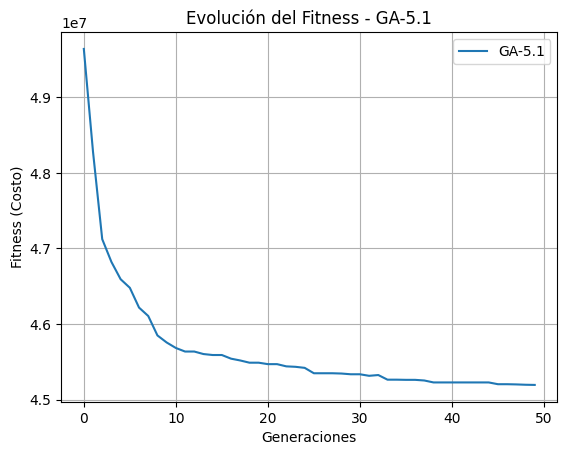

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Función de optimización local: Hill Climbing
def hill_climbing_3(individual, flow, distances, max_iters=150):
    best_individual = individual.copy()
    best_cost = fitness(best_individual[np.newaxis, :], flow, distances)[0]

    for _ in range(max_iters):
        # Generar un vecino intercambiando dos posiciones
        i, j = np.random.choice(len(individual), 2, replace=False)
        neighbor = best_individual.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Calcular el costo del vecino
        neighbor_cost = fitness(neighbor[np.newaxis, :], flow, distances)[0]

        # Si el vecino es mejor, actualizar
        if neighbor_cost < best_cost:
            best_individual, best_cost = neighbor, neighbor_cost

    return best_individual, best_cost


# Algoritmo genético mejorado
def genetic_algorithm_v5_1(flow, distances, population, generations=50, crossover_rate=0.9, initial_mutation_rate=0.3):
    best_fitness_per_gen = []
    mutation_rate = initial_mutation_rate

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness...")
        fitness_vals = fitness(population, flow, distances)
        best_fitness = np.min(fitness_vals)
        best_fitness_per_gen.append(best_fitness)

        print(f"Generación {gen + 1}: Mejor fitness = {best_fitness}")

        print(f"Generación {gen + 1}: Aplicando elitismo...")
        elites = elitism_selection(population, fitness_vals, retain_rate=0.2)

        next_generation = elites.tolist()
        while len(next_generation) < len(population):
            parents = population[np.random.choice(len(population), 2, replace=False)]
            if np.random.rand() < crossover_rate:
                offspring1 = pmx_crossover(parents[0], parents[1])
                offspring2 = pmx_crossover(parents[1], parents[0])
            else:
                offspring1, offspring2 = parents[0], parents[1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:len(population)])

        print(f"Generación {gen + 1}: Aplicando optimización local...")
        top_individuals = elitism_selection(population, fitness_vals, retain_rate=0.1)
        for i, individual in enumerate(top_individuals):
            optimized_individual, _ = hill_climbing_3(individual, flow, distances)
            population[i] = optimized_individual

        mutation_rate *= 0.95

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecutar el algoritmo genético mejorado
print("Iniciando algoritmo genético mejorado...")
start_time = time.time()
best_solution_ga5_1, best_cost_ga5_1, fitness_ga5_1 = genetic_algorithm_v5_1(flow, distances, population.copy(), generations=50)
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_ga5_1)
print("Costo asociado:")
print(best_cost_ga5_1)

# Visualizar evolución del fitness
plt.plot(fitness_ga5_1, label='GA-5.1')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - GA-5.1')
plt.legend()
plt.grid()
plt.show()


### v2

Incrementando el número de generaciones a 120

Iniciando algoritmo genético mejorado...
Generación 1/120: Evaluando fitness...
Generación 1: Mejor fitness = 49640646
Generación 1: Aplicando elitismo...
Generación 1: Aplicando optimización local...
Generación 2/120: Evaluando fitness...
Generación 2: Mejor fitness = 48184674
Generación 2: Aplicando elitismo...
Generación 2: Aplicando optimización local...
Generación 3/120: Evaluando fitness...
Generación 3: Mejor fitness = 47151018
Generación 3: Aplicando elitismo...
Generación 3: Aplicando optimización local...
Generación 4/120: Evaluando fitness...
Generación 4: Mejor fitness = 46795978
Generación 4: Aplicando elitismo...
Generación 4: Aplicando optimización local...
Generación 5/120: Evaluando fitness...
Generación 5: Mejor fitness = 46783072
Generación 5: Aplicando elitismo...
Generación 5: Aplicando optimización local...
Generación 6/120: Evaluando fitness...
Generación 6: Mejor fitness = 46497530
Generación 6: Aplicando elitismo...
Generación 6: Aplicando optimización local...

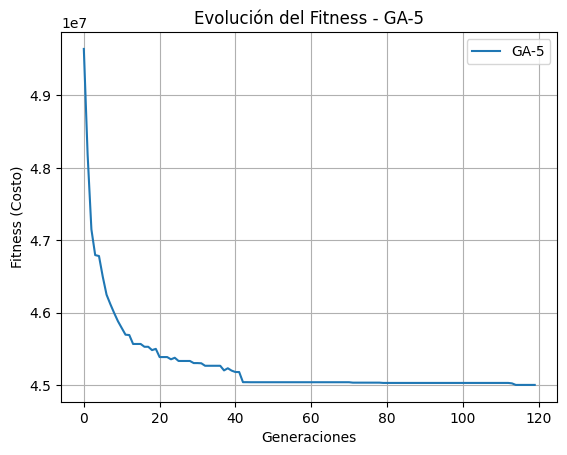

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Función de optimización local: Hill Climbing
def hill_climbing_3(individual, flow, distances, max_iters=150):
    best_individual = individual.copy()
    best_cost = fitness(best_individual[np.newaxis, :], flow, distances)[0]

    for _ in range(max_iters):
        # Generar un vecino intercambiando dos posiciones
        i, j = np.random.choice(len(individual), 2, replace=False)
        neighbor = best_individual.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Calcular el costo del vecino
        neighbor_cost = fitness(neighbor[np.newaxis, :], flow, distances)[0]

        # Si el vecino es mejor, actualizar
        if neighbor_cost < best_cost:
            best_individual, best_cost = neighbor, neighbor_cost

    return best_individual, best_cost


# Algoritmo genético mejorado
def genetic_algorithm_v5(flow, distances, population, generations=120, crossover_rate=0.9, initial_mutation_rate=0.3):
    best_fitness_per_gen = []
    mutation_rate = initial_mutation_rate

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness...")
        fitness_vals = fitness(population, flow, distances)
        best_fitness = np.min(fitness_vals)
        best_fitness_per_gen.append(best_fitness)

        print(f"Generación {gen + 1}: Mejor fitness = {best_fitness}")

        print(f"Generación {gen + 1}: Aplicando elitismo...")
        elites = elitism_selection(population, fitness_vals, retain_rate=0.2)

        next_generation = elites.tolist()
        while len(next_generation) < len(population):
            parents = population[np.random.choice(len(population), 2, replace=False)]
            if np.random.rand() < crossover_rate:
                offspring1 = pmx_crossover(parents[0], parents[1])
                offspring2 = pmx_crossover(parents[1], parents[0])
            else:
                offspring1, offspring2 = parents[0], parents[1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:len(population)])

        print(f"Generación {gen + 1}: Aplicando optimización local...")
        top_individuals = elitism_selection(population, fitness_vals, retain_rate=0.1)
        for i, individual in enumerate(top_individuals):
            optimized_individual, _ = hill_climbing_3(individual, flow, distances)
            population[i] = optimized_individual

        mutation_rate *= 0.95

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecutar el algoritmo genético mejorado
print("Iniciando algoritmo genético mejorado...")
start_time = time.time()
best_solution_ga5, best_cost_ga5, fitness_ga5 = genetic_algorithm_v5(flow, distances, population.copy(), generations=120)
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_ga5)
print("Costo asociado:")
print(best_cost_ga5)

# Visualizar evolución del fitness
plt.plot(fitness_ga5, label='GA-5')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - GA-5')
plt.legend()
plt.grid()
plt.show()


### v3

Iniciando algoritmo genético mejorado...
Generación 1/250: Evaluando fitness...
Generación 1: Mejor fitness = 49640646
Generación 1: Aplicando elitismo...
Generación 1: Aplicando optimización local...
Generación 2/250: Evaluando fitness...
Generación 2: Mejor fitness = 47657820
Generación 2: Aplicando elitismo...
Generación 2: Aplicando optimización local...
Generación 3/250: Evaluando fitness...
Generación 3: Mejor fitness = 46949186
Generación 3: Aplicando elitismo...
Generación 3: Aplicando optimización local...
Generación 4/250: Evaluando fitness...
Generación 4: Mejor fitness = 46320488
Generación 4: Aplicando elitismo...
Generación 4: Aplicando optimización local...
Generación 5/250: Evaluando fitness...
Generación 5: Mejor fitness = 46242172
Generación 5: Aplicando elitismo...
Generación 5: Aplicando optimización local...
Generación 6/250: Evaluando fitness...
Generación 6: Mejor fitness = 46085100
Generación 6: Aplicando elitismo...
Generación 6: Aplicando optimización local...

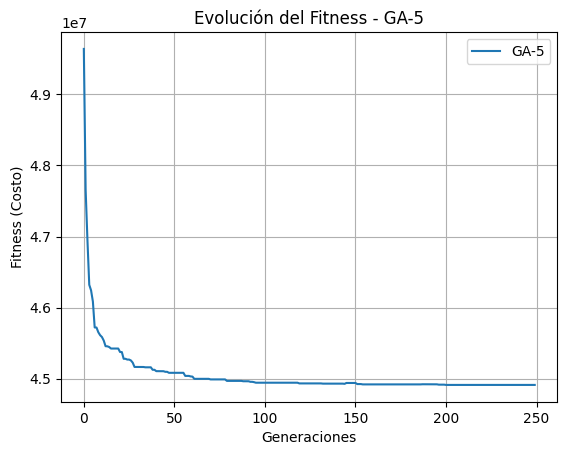

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Función de optimización local: Hill Climbing
def hill_climbing_4(individual, flow, distances, max_iters=250):
    best_individual = individual.copy()
    best_cost = fitness(best_individual[np.newaxis, :], flow, distances)[0]

    for _ in range(max_iters):
        # Generar un vecino intercambiando dos posiciones
        i, j = np.random.choice(len(individual), 2, replace=False)
        neighbor = best_individual.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]

        # Calcular el costo del vecino
        neighbor_cost = fitness(neighbor[np.newaxis, :], flow, distances)[0]

        # Si el vecino es mejor, actualizar
        if neighbor_cost < best_cost:
            best_individual, best_cost = neighbor, neighbor_cost

    return best_individual, best_cost


# Algoritmo genético mejorado
def genetic_algorithm_v5_3(flow, distances, population, generations=250, crossover_rate=0.9, initial_mutation_rate=0.3):
    best_fitness_per_gen = []
    mutation_rate = initial_mutation_rate

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness...")
        fitness_vals = fitness(population, flow, distances)
        best_fitness = np.min(fitness_vals)
        best_fitness_per_gen.append(best_fitness)

        print(f"Generación {gen + 1}: Mejor fitness = {best_fitness}")

        print(f"Generación {gen + 1}: Aplicando elitismo...")
        elites = elitism_selection(population, fitness_vals, retain_rate=0.2)

        next_generation = elites.tolist()
        while len(next_generation) < len(population):
            parents = population[np.random.choice(len(population), 2, replace=False)]
            if np.random.rand() < crossover_rate:
                offspring1 = pmx_crossover(parents[0], parents[1])
                offspring2 = pmx_crossover(parents[1], parents[0])
            else:
                offspring1, offspring2 = parents[0], parents[1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:len(population)])

        print(f"Generación {gen + 1}: Aplicando optimización local...")
        top_individuals = elitism_selection(population, fitness_vals, retain_rate=0.1)
        for i, individual in enumerate(top_individuals):
            optimized_individual, _ = hill_climbing_4(individual, flow, distances)
            population[i] = optimized_individual

        mutation_rate *= 0.95

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

# Ejecutar el algoritmo genético mejorado
print("Iniciando algoritmo genético mejorado...")
start_time = time.time()
best_solution_ga5_3, best_cost_ga5_3, fitness_ga5_3 = genetic_algorithm_v5_3(flow, distances, population.copy(), generations=250)
end_time = time.time()

# Resultados
print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_ga5_3)
print("Costo asociado:")
print(best_cost_ga5_3)

# Visualizar evolución del fitness
plt.plot(fitness_ga5_3, label='GA-5')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - GA-5')
plt.legend()
plt.grid()
plt.show()


### v4

Iniciando algoritmo genético mejorado...
Generación 1/500: Evaluando fitness...
Generación 1: Mejor fitness = 49640646
Generación 1: Aplicando elitismo...
Generación 1: Aplicando optimización local...
Generación 2/500: Evaluando fitness...
Generación 2: Mejor fitness = 46529080
Generación 2: Aplicando elitismo...
Generación 2: Aplicando optimización local...
Generación 3/500: Evaluando fitness...
Generación 3: Mejor fitness = 46060936
Generación 3: Aplicando elitismo...
Generación 3: Aplicando optimización local...
Generación 4/500: Evaluando fitness...
Generación 4: Mejor fitness = 45806900
Generación 4: Aplicando elitismo...
Generación 4: Aplicando optimización local...
Generación 5/500: Evaluando fitness...
Generación 5: Mejor fitness = 45706818
Generación 5: Aplicando elitismo...
Generación 5: Aplicando optimización local...
Generación 6/500: Evaluando fitness...
Generación 6: Mejor fitness = 45706818
Generación 6: Aplicando elitismo...
Generación 6: Aplicando optimización local...

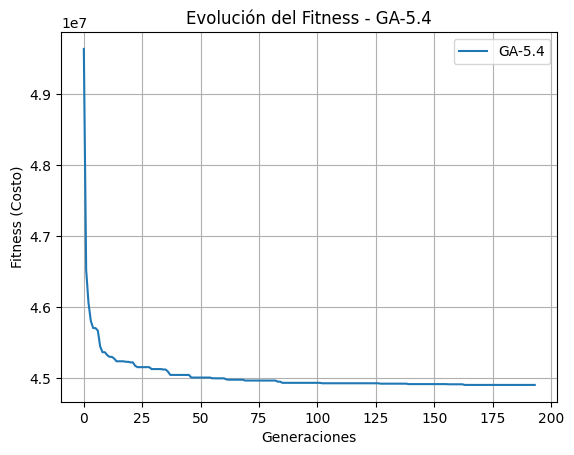

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time

def genetic_algorithm_v5_4(flow, distances, population, generations=500, crossover_rate=0.9, initial_mutation_rate=0.3, patience=30):
    best_fitness_per_gen = []
    mutation_rate = initial_mutation_rate
    stagnation_counter = 0
    last_best_fitness = None

    for gen in range(generations):
        print(f"Generación {gen + 1}/{generations}: Evaluando fitness...")
        fitness_vals = fitness(population, flow, distances)
        best_fitness = np.min(fitness_vals)
        best_fitness_per_gen.append(best_fitness)

        if last_best_fitness is not None and best_fitness == last_best_fitness:
            stagnation_counter += 1
        else:
            stagnation_counter = 0
            last_best_fitness = best_fitness

        print(f"Generación {gen + 1}: Mejor fitness = {best_fitness}")

        if stagnation_counter >= patience:
            print(f"El algoritmo se detiene después de {gen + 1} generaciones debido a falta de mejora en las últimas {patience} generaciones.")
            break

        print(f"Generación {gen + 1}: Aplicando elitismo...")
        elites = elitism_selection(population, fitness_vals, retain_rate=0.2)

        next_generation = elites.tolist()
        while len(next_generation) < len(population):
            parents = population[np.random.choice(len(population), 2, replace=False)]
            if np.random.rand() < crossover_rate:
                offspring1 = pmx_crossover(parents[0], parents[1])
                offspring2 = pmx_crossover(parents[1], parents[0])
            else:
                offspring1, offspring2 = parents[0], parents[1]
            if np.random.rand() < mutation_rate:
                offspring1 = mutate(offspring1)
            if np.random.rand() < mutation_rate:
                offspring2 = mutate(offspring2)
            next_generation.extend([offspring1, offspring2])

        population = np.array(next_generation[:len(population)])

        print(f"Generación {gen + 1}: Aplicando optimización local...")
        top_individuals = elitism_selection(population, fitness_vals, retain_rate=0.1)
        for i, individual in enumerate(top_individuals):
            optimized_individual, _ = hill_climbing_4(individual, flow, distances, 500)
            population[i] = optimized_individual

        mutation_rate *= 0.95

    best_idx = np.argmin(fitness(population, flow, distances))
    return population[best_idx], fitness(population[best_idx:best_idx+1], flow, distances)[0], best_fitness_per_gen

print("Iniciando algoritmo genético mejorado...")
start_time = time.time()
best_solution_ga5_4, best_cost_ga5_4, fitness_ga5_4 = genetic_algorithm_v5_4(flow, distances, population.copy(), generations=500, patience=30)
end_time = time.time()

print(f"Tiempo de ejecución: {end_time - start_time:.2f} segundos")
print("Mejor permutación encontrada:")
print(best_solution_ga5_4)
print("Costo asociado:")
print(best_cost_ga5_4)

plt.plot(fitness_ga5_4, label='GA-5.4')
plt.xlabel('Generaciones')
plt.ylabel('Fitness (Costo)')
plt.title('Evolución del Fitness - GA-5.4')
plt.legend()
plt.grid()
plt.show()
